<a href="https://colab.research.google.com/github/chrisdionisius/MachineLearning2022/blob/main/KuisMachineLearning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kuis 1 - Machine Learning

*   NIM: 2241727008
*   Nama: Dionisius Damarta Yapenrui
*   Kelas: TI-4J

# Sumber
## Dataset ini diambil dari [Kaggle : GPU Benchmarks Compilation (Alan Jo)](https://www.kaggle.com/datasets/alanjo/gpu-benchmarks)

Pada kuis ini diambil dataset GPU comparison yang bertujuan untuk mengetahui manakah faktor yang paling mempengaruhi tinggi-rendahnya harga GPU di pasaran.

*Keterangan: dataset sudah dinormalisasi terlebih dahulu dengan menghapus beberapa row yang kurang lengkap*

In [64]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [65]:
# import package
import numpy as np
import pandas as pd

In [85]:
# baca data
data = pd.read_csv('/content/drive/MyDrive/dataset/gpu2.csv')
data.head()

,gpuName,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate,category
0,GeForce RTX 3060,16958,951,329.00,51.55,170.0,99.76,2021,Desktop
1,RTX A5000,22867,984,2631.20,8.69,230.0,99.42,2021,Workstation
2,Radeon RX 6600 XT,15853,1003,399.99,39.63,160.0,99.08,2021,Desktop
3,GeForce GTX 1660 Ti,11794,702,349.99,33.70,120.0,98.29,2019,Desktop
4,GeForce GTX 1660,11695,796,399.99,29.24,120.0,97.46,2019,Desktop


In [67]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gpuName           387 non-null    object 
 1   G3Dmark           387 non-null    int64  
 2   G2Dmark           387 non-null    int64  
 3   price             387 non-null    float64
 4   gpuValue          387 non-null    float64
 5   TDP               387 non-null    float64
 6   powerPerformance  387 non-null    float64
 7   testDate          387 non-null    int64  
 8   category          387 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 27.3+ KB


,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,4700.754522,444.754522,457.165917,12.420517,119.062274,33.058703,2013.421189
std,6119.561818,276.306101,807.532121,11.163704,88.888924,30.598605,3.244104
min,51.000000,29.000000,17.500000,0.120000,4.400000,1.420000,2009.000000
25%,531.500000,209.500000,111.995000,3.360000,49.000000,9.415000,2011.000000
50%,2008.000000,416.000000,225.000000,8.570000,90.000000,22.400000,2012.000000
75%,5967.000000,655.500000,438.025000,18.455000,170.000000,54.075000,2015.000000
max,29094.000000,1117.000000,8999.000000,69.730000,500.000000,152.010000,2022.000000


In [68]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

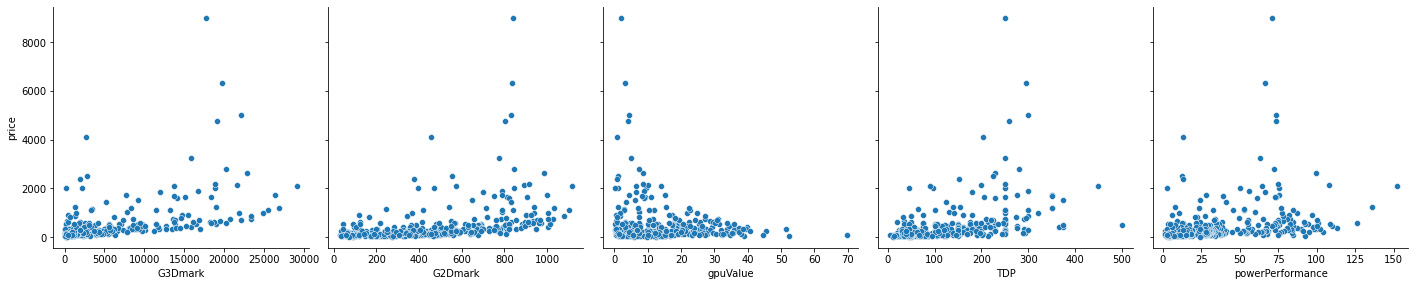

In [69]:
# operasi visualisasi
sns.pairplot(data, x_vars=['G3Dmark', 'G2Dmark','gpuValue','TDP','powerPerformance'], 
             y_vars='price', height=4, aspect=1, kind='scatter')
plt.show()

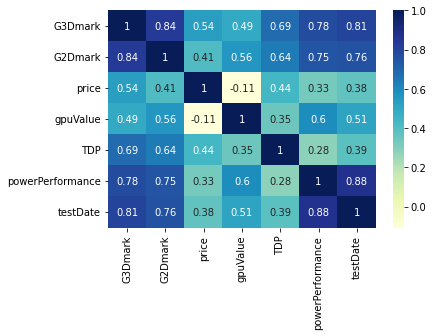

In [70]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [84]:
# Disini variable yang memiliki korelasi paling dekat dengan price adalah skor G3Dmark yakni 0.54, 
# sehingga skor G3Dmark dipilih sebagai variable X
X = data['G3Dmark']
y = data['price']

In [72]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [73]:
# hasil training dtaset
X_train
y_train

358     62.97
19     389.99
26     279.99
322    978.99
35     378.00
        ...  
343    119.99
359     79.99
323    139.99
280     69.99
8      528.89
Name: price, Length: 270, dtype: float64

In [74]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [75]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const      121.579318
G3Dmark      0.067663
dtype: float64

In [76]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     86.98
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           4.28e-18
Time:                        07:19:08   Log-Likelihood:                -2155.6
No. Observations:                 270   AIC:                             4315.
Df Residuals:                     268   BIC:                             4322.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.5793     54.495      2.231      0.027      14.286     228.873
G3Dmark        0.0677      0.007      9.326      0.000       0.053       0.082
==============================================================================
Omnibus:                      365.920   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36266.593
Skew:                           6.244   Prob(JB):                         0.00
Kurtosis:                      58.387   Cond. No.                     9.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

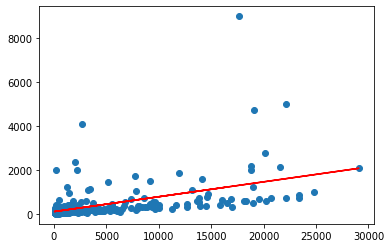

In [86]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 121.579318 + (0.067663*X_train), 'r')
plt.show()

In [78]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

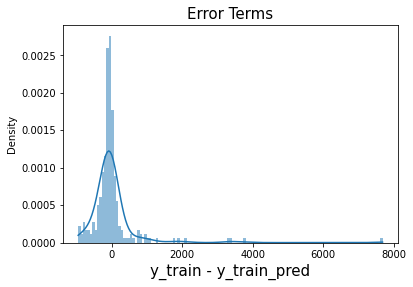

In [79]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.histplot(res, kde=True, stat="density", linewidth=0)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

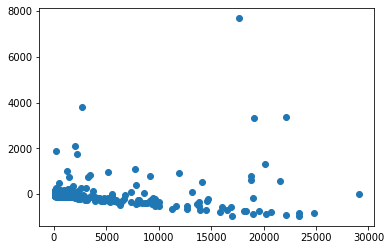

In [80]:
plt.scatter(X_train,res)
plt.show()

In [81]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


305    142.960752
157    740.017013
217    214.547960
304    286.541145
349    169.484557
dtype: float64

In [82]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.3812595488459455

Dari data training didapatkan hasil r^2 = 0.245 sementara pada hasil data testing r^2 = 0.381

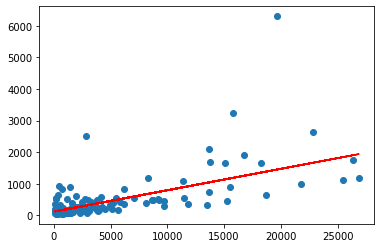

In [83]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()